---
# **Introduction To Machine Learning**
## **Supervised Learning (= classification):**

*   **k-Nearest Neighbor (kNN)**
*   naive Bayesian (NB)
*   Decision Tree (DT): C4.5, CART, etc.
*   AdaBoost
*   Support Vector Machine (SVM)
---

kNN is a simple algorithm that stores all available cases and classifies new cases based on a distance metric (e.g., Euclidean distance metric).
![Distance Formula](https://miro.medium.com/max/626/1*whWqafWqGnpM-_3SDEypPA.png)


## <font color = #950CDF> Part 1: </font> <font color = #4854E8> Information of Dataset </font>

<b>The Banknote Authentication Dataset:</b> There are 1372 items (images of banknotes — think Euro or dollar bill). There are 4 predictor variables (variance of image, skewness, kurtosis, entropy). The variable to predict is encoded as 0 (authentic) or 1 (forgery). 

https://archive.ics.uci.edu/ml/datasets/banknote+authentication

<b> ASSIGNMENT: </b> Use Iris data, which is a small, widely-used, easy classic dataset from Fisher, 1936. 

https://archive.ics.uci.edu/dataset/53/iris

### <font color = #27C3E5> 1.1: </font> <font color = #41EA46> Import Libraries and Dataset </font>

#### <font color = blue>Import the Libraries

In [106]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from collections import Counter
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, mean_absolute_error, roc_auc_score

#### <font color = blue>Import the Dataset

In [107]:
col_names = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'species']
data_file= 'iris.csv'
df = pd.read_csv(data_file)
df.tail(3)

,sepal_length,sepal_width,petal_length,petal_width,species
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica
149,5.9,3.0,5.1,1.8,virginica


### <font color = #27C3E5> 1.2: </font> <font color = #41EA46> Data Summary and Visualization </font>

#### <font color = blue>Data Information

In [108]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


#### <font color = blue> Visualize the whole dataset

In [109]:
plt.style.use('fivethirtyeight')
sns.pairplot(df, hue = 'species')

#### <font color = blue> Visualize the Label Class

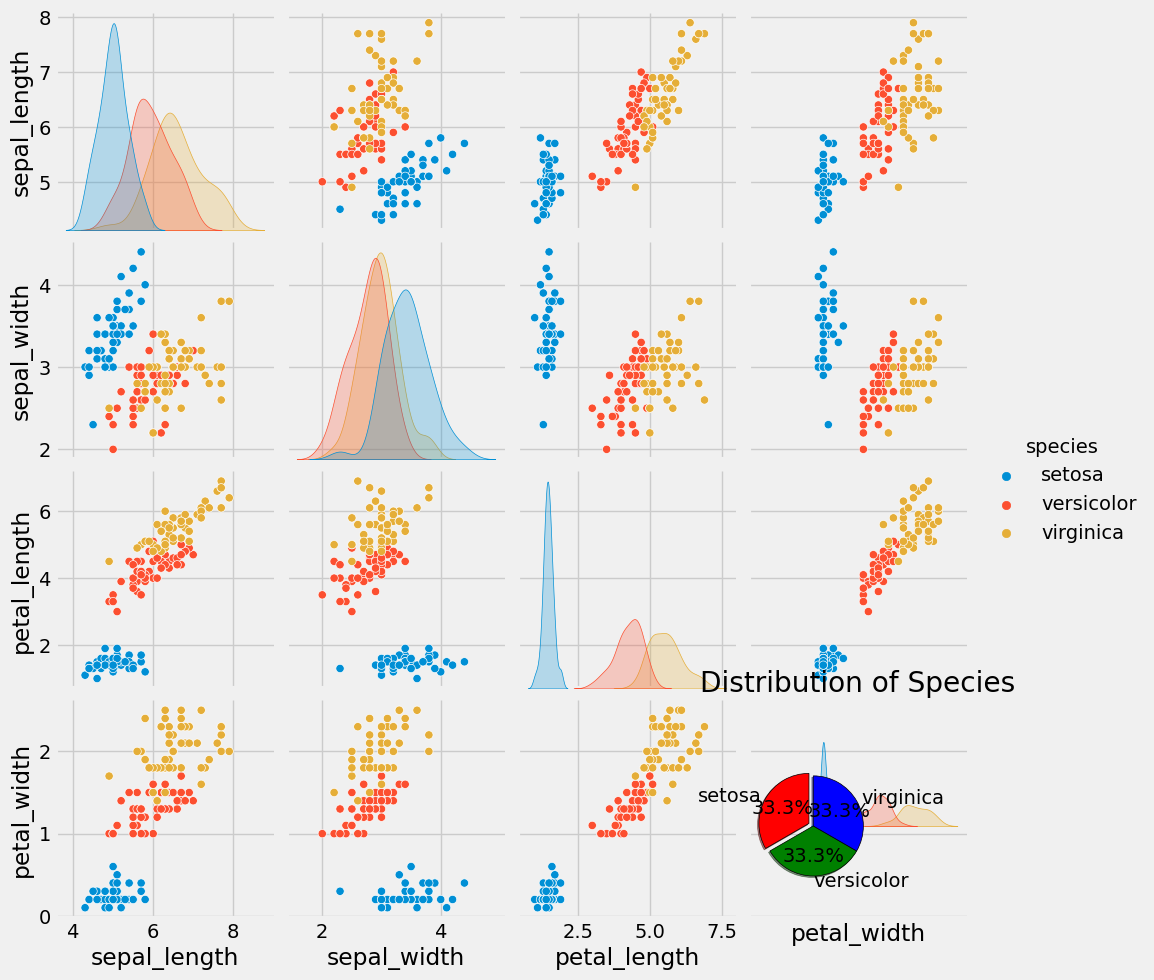

In [110]:
# Assuming you have a DataFrame 'df' with a 'species' column
species_counts = df['species'].value_counts()

# Extract labels and sizes from the species_counts
labels = species_counts.index
sizes = species_counts.values

colors = ['red', 'green', 'blue']  # You can customize the colors
explode = (0.1, 0, 0)  # Explode the 1st slice

plt.pie(sizes, labels=labels, colors=colors, explode=explode, autopct='%1.1f%%',
        shadow=True, startangle=90, wedgeprops={'edgecolor': 'black'})
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.title('Distribution of Species')
plt.show()


## <font color = #950CDF> Part 2: </font> <font color = #4854E8> Data Preprocessing </font>
In this part, we did data preprocessing. firstly, we define our predictor and target attribute. Then we oversee missing values because we found some missing values in the first three columns. To deal with the missing value we use Simple Imputer from sklearn and apply the mean strategy to our predictor data. After that, we apply Feature Scaling on our data as we know Feature Scaling is the most important part of data preprocessing. If we see our dataset, then some attribute has information in Numeric value some value is extremely high, and some are exceptionally low if we see the Variance of Image and Entropy. This will cause some issues in our machinery model to solve that problem we set all values on the same scale there are two methods to solve that problem and we use Standard Scaler. In the end, we split our data for training and testing. And ratio for training and testing is 0.8 and 0.2, respectively.
> Define Predictor and target <br> Attribute Dealing with Missing Value <br> Feature Scaling <br> Split the Data into Train and Test

### <font color = #27C3E5> 2.1: </font> <font color = #41EA46> Define Predictor and target Attribute </font>

In [111]:
X = df.iloc[:, :-1].to_numpy()
Y = df.iloc[:, -1].to_numpy()
print('predictor attribute', X)
print('target attribute', Y)

predictor attribute [[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]
 [5.4 3.9 1.7 0.4]
 [4.6 3.4 1.4 0.3]
 [5.  3.4 1.5 0.2]
 [4.4 2.9 1.4 0.2]
 [4.9 3.1 1.5 0.1]
 [5.4 3.7 1.5 0.2]
 [4.8 3.4 1.6 0.2]
 [4.8 3.  1.4 0.1]
 [4.3 3.  1.1 0.1]
 [5.8 4.  1.2 0.2]
 [5.7 4.4 1.5 0.4]
 [5.4 3.9 1.3 0.4]
 [5.1 3.5 1.4 0.3]
 [5.7 3.8 1.7 0.3]
 [5.1 3.8 1.5 0.3]
 [5.4 3.4 1.7 0.2]
 [5.1 3.7 1.5 0.4]
 [4.6 3.6 1.  0.2]
 [5.1 3.3 1.7 0.5]
 [4.8 3.4 1.9 0.2]
 [5.  3.  1.6 0.2]
 [5.  3.4 1.6 0.4]
 [5.2 3.5 1.5 0.2]
 [5.2 3.4 1.4 0.2]
 [4.7 3.2 1.6 0.2]
 [4.8 3.1 1.6 0.2]
 [5.4 3.4 1.5 0.4]
 [5.2 4.1 1.5 0.1]
 [5.5 4.2 1.4 0.2]
 [4.9 3.1 1.5 0.2]
 [5.  3.2 1.2 0.2]
 [5.5 3.5 1.3 0.2]
 [4.9 3.6 1.4 0.1]
 [4.4 3.  1.3 0.2]
 [5.1 3.4 1.5 0.2]
 [5.  3.5 1.3 0.3]
 [4.5 2.3 1.3 0.3]
 [4.4 3.2 1.3 0.2]
 [5.  3.5 1.6 0.6]
 [5.1 3.8 1.9 0.4]
 [4.8 3.  1.4 0.3]
 [5.1 3.8 1.6 0.2]
 [4.6 3.2 1.4 0.2]
 [5.3 3.7 1.5 0.2]
 [5.  3.3 1.4 0.2]
 [7.  3.2 4.7 1.4]
 [6.4 3.2 4

### <font color = #27C3E5> 2.2: </font> <font color = #41EA46> Dealing with Missing Value </font>

#### <font color = blue> Check the Missing Value

In [112]:
df.isnull().sum()          

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

#### <font color = blue> Apply Mean Strategy to Handle Missing Value

In [113]:
imputer = SimpleImputer(missing_values = np.nan, strategy = 'mean')       
imputer  = imputer.fit(X)
X = imputer.transform(X)
X

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
       [4.9, 3

### <font color = #27C3E5> 2.3: </font> <font color = #41EA46> Feature Scaling </font>

In [114]:
sc_X = StandardScaler()
X = sc_X.fit_transform(X)
X

array([[-9.00681170e-01,  1.01900435e+00, -1.34022653e+00,
        -1.31544430e+00],
       [-1.14301691e+00, -1.31979479e-01, -1.34022653e+00,
        -1.31544430e+00],
       [-1.38535265e+00,  3.28414053e-01, -1.39706395e+00,
        -1.31544430e+00],
       [-1.50652052e+00,  9.82172869e-02, -1.28338910e+00,
        -1.31544430e+00],
       [-1.02184904e+00,  1.24920112e+00, -1.34022653e+00,
        -1.31544430e+00],
       [-5.37177559e-01,  1.93979142e+00, -1.16971425e+00,
        -1.05217993e+00],
       [-1.50652052e+00,  7.88807586e-01, -1.34022653e+00,
        -1.18381211e+00],
       [-1.02184904e+00,  7.88807586e-01, -1.28338910e+00,
        -1.31544430e+00],
       [-1.74885626e+00, -3.62176246e-01, -1.34022653e+00,
        -1.31544430e+00],
       [-1.14301691e+00,  9.82172869e-02, -1.28338910e+00,
        -1.44707648e+00],
       [-5.37177559e-01,  1.47939788e+00, -1.28338910e+00,
        -1.31544430e+00],
       [-1.26418478e+00,  7.88807586e-01, -1.22655167e+00,
      

### <font color = #27C3E5> 2.4: </font> <font color = #41EA46> Split the Data into Train and Test </font>

In [115]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.2, random_state = 0)

#### <font color = blue> Training Data

In [116]:
print("X_train", X_train.shape)
print("Y_train", y_train.shape)

X_train (120, 4)
Y_train (120,)


#### <font color = blue> Testing Data

In [117]:
print("X_test", X_test.shape)
print("X_test", y_test.shape)

X_test (30, 4)
X_test (30,)


## <font color = #950CDF> Part 3: </font> <font color = #4854E8> Build k-Nearest Neighbors </font>
In this part, we build k-Nearest Neighbors from scratch and with sklearn as well.

### <font color = #27C3E5> 3.1: </font> <font color = #41EA46> Implementation from Scratch </font>

#### <font color = blue> Build Model </font>

In [118]:
def euclidean_distance(x1, x2):
    return np.sqrt(np.sum((x1 - x2) ** 2))


class KNN:
    def __init__(self, k=3):
        self.k = k

    def fit(self, X, y):
        self.X_train = X
        self.y_train = y

    def predict(self, X):
        y_pred = [self._predict(x) for x in X]
        return np.array(y_pred)

    def _predict(self, x):
        distances = [euclidean_distance(x, x_train) for x_train in self.X_train]
        k_idx = np.argsort(distances)[: self.k]
        k_neighbor_labels = [self.y_train[i] for i in k_idx]
        most_common = Counter(k_neighbor_labels).most_common(1)
        return most_common[0][0]

#### <font color = blue> Inititialize Model </font>

In [119]:
knn_scratch = KNN( k = 5)

#### <font color = blue> Fit the Training Data into Model</font>

In [120]:
knn_scratch.fit(X_train, y_train)

#### <font color = blue> Predict the Test Data</font>

In [121]:
Y_predict_scratch = knn_scratch.predict(X_test)
Y_predict_scratch

array(['virginica', 'versicolor', 'setosa', 'virginica', 'setosa',
       'virginica', 'setosa', 'versicolor', 'versicolor', 'versicolor',
       'virginica', 'versicolor', 'versicolor', 'versicolor',
       'versicolor', 'setosa', 'versicolor', 'versicolor', 'setosa',
       'setosa', 'virginica', 'versicolor', 'setosa', 'setosa',
       'virginica', 'setosa', 'setosa', 'versicolor', 'versicolor',
       'setosa'], dtype='<U10')

#### <font color = blue> Accuracy Score</font>

In [122]:
Accuracy_Scratch = accuracy_score(Y_predict_scratch, y_test)
print('Accuracy Score:', Accuracy_Scratch)

Accuracy Score: 1.0


### <font color = #27C3E5> 3.2: </font> <font color = #41EA46> Implementation with Scikit-Learn </font>

#### <font color = blue> Import Model from Scikit-learn

In [123]:
from sklearn.neighbors import KNeighborsClassifier

#### <font color = blue> Initialize the Model

In [124]:
knn_Sklearn = KNeighborsClassifier(n_neighbors= 5, metric= 'minkowski', p= 2)

#### <font color = blue> Fit the Training Data into Model

In [125]:
knn_Sklearn.fit(X_train, y_train)

KNeighborsClassifier()

#### <font color = blue> Predict the Test Data</font>

In [126]:
Y_predict_Sklearn = knn_Sklearn.predict(X_test)
Y_predict_Sklearn

array(['virginica', 'versicolor', 'setosa', 'virginica', 'setosa',
       'virginica', 'setosa', 'versicolor', 'versicolor', 'versicolor',
       'virginica', 'versicolor', 'versicolor', 'versicolor',
       'versicolor', 'setosa', 'versicolor', 'versicolor', 'setosa',
       'setosa', 'virginica', 'versicolor', 'setosa', 'setosa',
       'virginica', 'setosa', 'setosa', 'versicolor', 'versicolor',
       'setosa'], dtype=object)

#### <font color = blue> Accuracy Score</font>

In [127]:
Accuracy_Sklearn = accuracy_score(Y_predict_Sklearn, y_test)
print('Accuracy Score:', Accuracy_Sklearn)

Accuracy Score: 1.0


### <font color = #27C3E5> 3.3: </font> <font color = #41EA46> Comparison (Scratch vs. Scikit-Learn) </font>

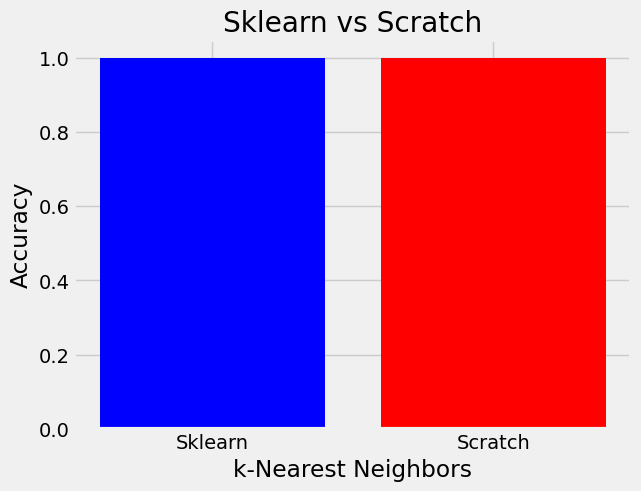

In [128]:
accuracy = [Accuracy_Sklearn, Accuracy_Scratch]
label = ["Sklearn", "Scratch"]
plt.bar(label, accuracy, color = ['blue', 'red'])
plt.title("Sklearn vs Scratch")
plt.xlabel("k-Nearest Neighbors")
plt.ylabel("Accuracy")
plt.show()

> As we can see 100% accuracy from both implementation

## <font color = #950CDF> Part 4: </font> <font color = #4854E8> Evaluate the Result </font>
In this part, we evaluate the k-Nearest Neighbors Scratch model (it's doesn't matter because 100% result from both implementation). first we make confusion matrix and we visualize the score following ("Accuracy", "Precision", "TPR", "FPR", "F-Score", "Specificity", "Error" and "Roc Area").

### <font color = #27C3E5> 4.1: </font> <font color = #41EA46> Confusion Matrix</font>

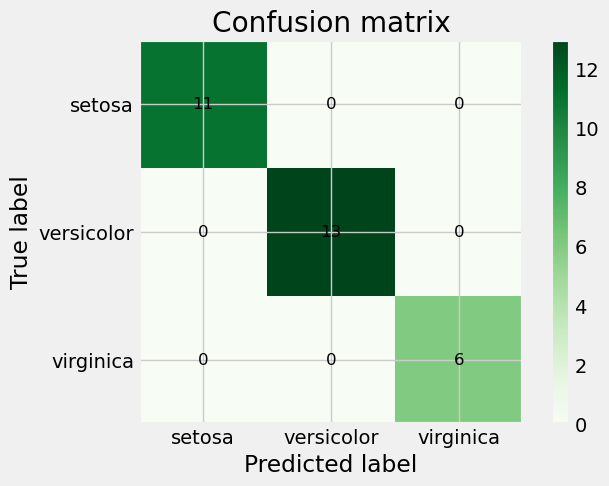

In [129]:
# Compute the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Now, you can use your code to visualize the confusion matrix
plt.figure()
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Greens)
plt.title('Confusion matrix')
plt.colorbar()
plt.xticks(np.arange(3), iris.target_names)
plt.yticks(np.arange(3), iris.target_names)
plt.tight_layout()
plt.ylabel('True label')
plt.xlabel('Predicted label')

# Annotate the confusion matrix with values
for i in range(3):
    for j in range(3):
        plt.text(j, i, str(cm[i, j]), ha='center', va='center', color='black', fontsize=12)

plt.show()

In [138]:
from sklearn.metrics import confusion_matrix 
import matplotlib.pyplot as plt

# 3x3 confusion matrix
cm = [[11, 0, 0],  
      [0, 13, 0],
      [0, 0, 6]]

# Split into three 2x2 matrices
cm_0 = [[11, 0], 
        [0, 13]]
cm_1 = [[0, 13],
        [0, 6]]  
cm_2 = [[11, 0],
        [0, 6]]

# Plot the 2x2 confusion matrices
plt.figure(figsize=(12, 4))

plt.subplot(131)
plt.imshow(cm_0, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('2x2 Confusion Matrix 1')
plt.colorbar()
plt.xticks([0, 1], ['Predicted 0', 'Predicted 1'])
plt.yticks([0, 1], ['True 0', 'True 1'])
plt.tight_layout()

plt.subplot(132)  
plt.imshow(cm_1, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('2x2 Confusion Matrix 2')
plt.colorbar()
plt.xticks([0, 1], ['Predicted 1', 'Predicted 2'])
plt.yticks([0, 1], ['True 1', 'True 2'])
plt.tight_layout()

plt.subplot(133)
plt.imshow(cm_2, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('2x2 Confusion Matrix 3')
plt.colorbar()
plt.xticks([0, 1], ['Predicted 0', 'Predicted 2'])  
plt.yticks([0, 1], ['True 0', 'True 2'])
plt.tight_layout()

# Function to calculate metrics
def calculate_metrics(matrix):
  tp = matrix[1][1]
  fp = matrix[0][1]
  fn = matrix[1][0]
  
  precision = tp / (tp + fp)
  tpr = tp / (tp + fn)
  fpr = fp / (fp + matrix[0][0])
  
  return precision, tpr, fpr

# Calculate metrics for each 2x2 confusion matrix
precision_0, tpr_0, fpr_0 = calculate_metrics(cm_0)
precision_1, tpr_1, fpr_1 = calculate_metrics(cm_1) 
precision_2, tpr_2, fpr_2 = calculate_metrics(cm_2)

# Calculate micro-averages  
tp_micro = sum([m[1][1] for m in [cm_0, cm_1, cm_2]]) 
fp_micro = sum([m[0][1] for m in [cm_0, cm_1, cm_2]])
fn_micro = sum([m[1][0] for m in [cm_0, cm_1, cm_2]])

precision_micro = tp_micro / (tp_micro + fp_micro)
tpr_micro = tp_micro / (tp_micro + fn_micro)
fpr_micro = fp_micro / (fp_micro + sum([m[0][0] for m in [cm_0, cm_1, cm_2]]))

# Calculate macro-averages
precision_macro = sum([precision_0, precision_1, precision_2]) / 3
tpr_macro = sum([tpr_0, tpr_1, tpr_2]) / 3 
fpr_macro = sum([fpr_0, fpr_1, fpr_2]) / 3

# Print results
print("Confusion Matrix 1:")
print(cm_0)
print("Precision:", precision_0) 
print("TPR:", tpr_0)
print("FPR:", fpr_0)

print("\nConfusion Matrix 2:")
print(cm_1)
print("Precision:", precision_1)
print("TPR:", tpr_1) 
print("FPR:", fpr_1)  

print("\nConfusion Matrix 3:")
print(cm_2)
print("Precision:", precision_2)
print("TPR:", tpr_2)
print("FPR:", fpr_2)

print("\nMicro Precision:", precision_micro)  
print("Micro TPR:", tpr_micro)
print("Micro FPR:", fpr_micro)

print("\nMacro Precision:", precision_macro)
print("Macro TPR:", tpr_macro)
print("Macro FPR:", fpr_macro)

Confusion Matrix 1:
[[11, 0], [0, 13]]
Precision: 1.0
TPR: 1.0
FPR: 0.0

Confusion Matrix 2:
[[0, 13], [0, 6]]
Precision: 0.3157894736842105
TPR: 1.0
FPR: 1.0

Confusion Matrix 3:
[[11, 0], [0, 6]]
Precision: 1.0
TPR: 1.0
FPR: 0.0

Micro Precision: 0.6578947368421053
Micro TPR: 1.0
Micro FPR: 0.37142857142857144

Macro Precision: 0.7719298245614036
Macro TPR: 1.0
Macro FPR: 0.3333333333333333


### <font color = #27C3E5> 4.2: </font> <font color = #41EA46>  Evaluate the Results </font>

#### <font color = blue>4.2.1: Calculate the Results

In [139]:
# Initialize the label encoder
label_encoder = LabelEncoder()

# Fit and transform labels in y_test
y_test_encoded = label_encoder.fit_transform(y_test)

# Transform labels in Y_predict_scratch
Y_predict_scratch_encoded = label_encoder.transform(Y_predict_scratch)

# Accuracy Score
Accuracy = accuracy_score(y_test, Y_predict_scratch)
print('Accuracy Score:', Accuracy)

# Precision Score for multi-class classification
Precision = precision_score(y_test, Y_predict_scratch, average='weighted')
print('Precision Score:', Precision)

# True positive Rate (TPR) or Sensitivity or Recall for multi-class classification
TPR = recall_score(y_test, Y_predict_scratch, average='weighted')
print('True positive Rate:', TPR)

# Specificity (True Negative Rate) for multi-class classification
def specificity_score(y_true, y_pred):
    cm = confusion_matrix(y_true, y_pred)
    tn = cm[0, 0]  # True negatives
    fp = cm[0, 1]  # False positives
    specificity = tn / (tn + fp)
    return specificity

Specificity = specificity_score(y_test, Y_predict_scratch)
print('Specificity:', Specificity)

# False positive Rate (FPR) for multi-class classification
FPR = 1 - Specificity
print('False positive Rate', FPR)

# F1 Score or F-Measure or F-Score
F1 = f1_score(y_test, Y_predict_scratch, average='weighted')
print('F1 Score:', F1)

# Calculate ROC-AUC
from sklearn.metrics import roc_auc_score

y_score = knn_Sklearn.predict_proba(X_test)  # Replace 'clf' with your classifier
Roc = roc_auc_score(y_test_encoded, y_score, average='weighted', multi_class='ovr')
print('ROC Area:', Roc)

Accuracy Score: 1.0
Precision Score: 1.0
True positive Rate: 1.0
Specificity: 1.0
False positive Rate 0.0
F1 Score: 1.0
ROC Area: 1.0


#### <font color = blue>4.2.2: Visualize the Results

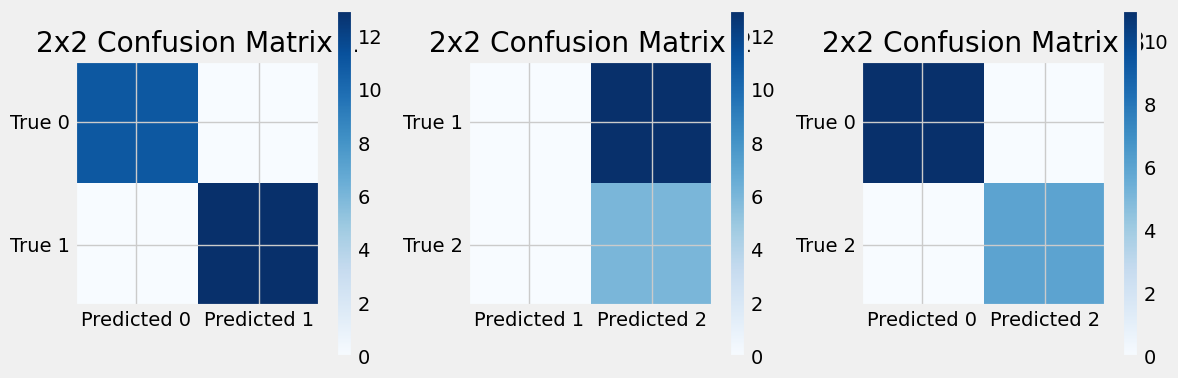

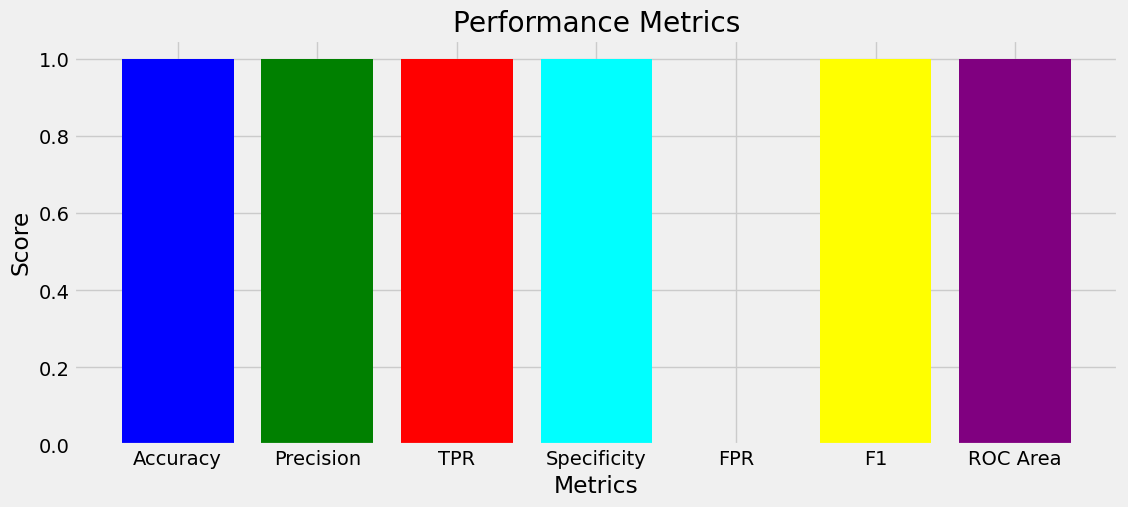

In [140]:
import matplotlib.pyplot as plt

# Define the evaluation metrics and labels
metrics = [Accuracy, Precision, TPR, Specificity, FPR, F1, Roc]
labels = ['Accuracy', 'Precision', 'TPR', 'Specificity', 'FPR', 'F1', 'ROC Area']

# Create a bar chart
plt.figure(figsize=(12, 5))
plt.bar(labels, metrics, color=['blue', 'green', 'red', 'cyan', 'magenta', 'yellow', 'purple'])
plt.xlabel('Metrics')
plt.ylabel('Score')
plt.title('Performance Metrics')
plt.show()

## <font color = #950CDF> Part 5: </font> <font color = #4854E8> Making A Single Prediction </font>
In this part, we make a single Prediction based on new observation

In [133]:
col = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'species']
pd.DataFrame([['5.4', '3.7', '1.5', '0.2', '?']], columns =col)

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.4,3.7,1.5,0.2,?


In [134]:
new_prediction = knn_scratch.predict(sc_X.transform(np.array([[5.4, 3.7, 1.5, 0.2]])))

In [135]:
if new_prediction[0] == 0:
    print("Setosa")
elif new_prediction[0] == 1:
    print("Versicolor")
else:
    print("Virginica")

Virginica
